### Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import CSV data into a dataframe

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'])

In [4]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


### Set dataframe index to the 'date' column

In [5]:
df = df.set_index('date')

In [6]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


### Clean data by filtering out days where views were in the top 2.5% or bottom 2.5% of the dataset

In [7]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [8]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


#### (Not sure why you would do that, but I was instructed to do so...)

In [9]:
df = df.rename(columns={'value' : 'Page Views'})

In [10]:
df

,Page Views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Use Matplotlib to draw a line chart. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0, 0.5, 'Page Views')

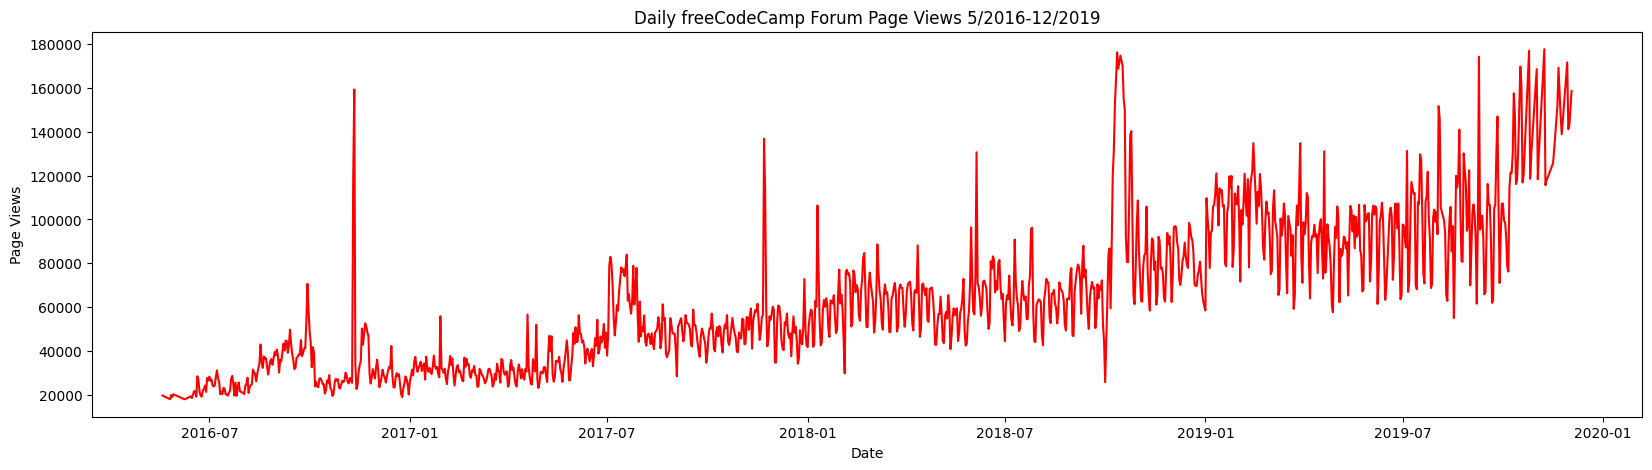

In [11]:
fig = plt.figure(figsize=(20,5))
plt.plot(df, color='r', figure=fig)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

### Draw a bar chart. Show average daily views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

### First we'll copy the dataframe so we can modify it a bit.

In [12]:
df_bar = df.copy()

In [13]:
df_bar

,Page Views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### We'll reset_index so we can pull the year and month from the date.

In [14]:
df_bar.reset_index(inplace=True)

In [15]:
df_bar

,date,Page Views
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [16]:
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.month_name() for d in df_bar.date]

In [17]:
df_bar

,date,Page Views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,November
1234,2019-11-29,171584,2019,November
1235,2019-11-30,141161,2019,November
1236,2019-12-01,142918,2019,December


### Since we want a bar plot with months grouped by year, we'll use groupby and grab average page views per month.

In [18]:
grouped = df_bar.groupby(['year', 'month'])['Page Views'].mean()

In [19]:
grouped

year  month    
2016  August        31049.193548
      December      27832.419355
      July          24109.678571
      June          21875.105263
      May           19432.400000
      November      40448.633333
      October       27398.322581
      September     41476.866667
2017  April         30878.733333
      August        47712.451613
      December      48420.580645
      February      31113.071429
      January       32785.161290
      July          65806.838710
      June          43577.500000
      March         29369.096774
      May           34244.290323
      November      57701.566667
      October       47438.709677
      September     47376.800000
2018  April         62350.833333
      August        62831.612903
      December      80047.483871
      February      65679.000000
      January       58580.096774
      July          63591.064516
      June          70117.000000
      March         62693.774194
      May           56562.870968
      November      78688.3

### Using reset_index on this GroupedBy object will "collapse it" into a dataframe that we can use.

In [20]:
grouped = grouped.reset_index()

In [21]:
grouped

,year,month,Page Views
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


### Here, some renaming to make the end result prettier.

In [22]:
grouped = grouped.rename(columns={'month' : 'Months', 'year' : 'Years', 'Page Views' : 'Average Page Views'})

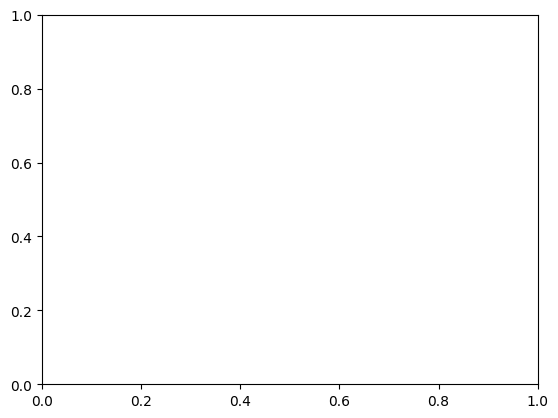

In [23]:
fig, ax = plt.subplots()

In [24]:
palette = sns.color_palette("Paired", 12)

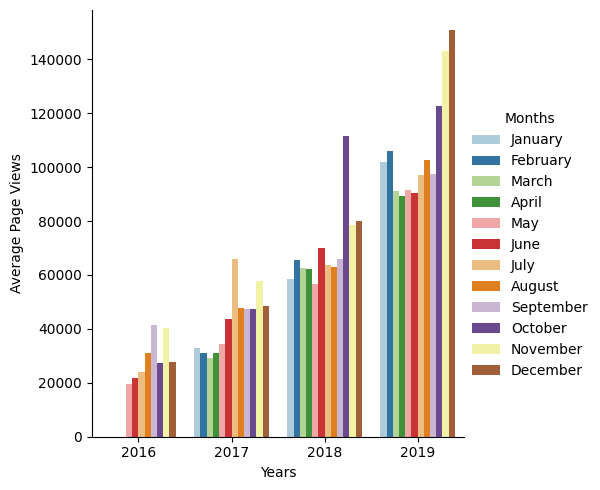

In [25]:
g = sns.catplot(data=grouped, x='Years', y='Average Page Views', kind='bar', hue='Months', hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette=palette)

### Next, we need to draw two adjacent box plots (using Seaborn). They will show how the values are distributed within a given year or month and how it compares over time. The first chart will be titled "Year-wise Box Plot (Trend)" and the second "Month-wise Box Plot (Seasonality)". The month labels should start with "Jan".

### First we'll copy the dataframe into a new one, like we did earlier.

In [26]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [27]:
df_box = df_box.rename(columns={'year' : 'Year', 'month' : 'Month'})

In [28]:
df_box

,date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


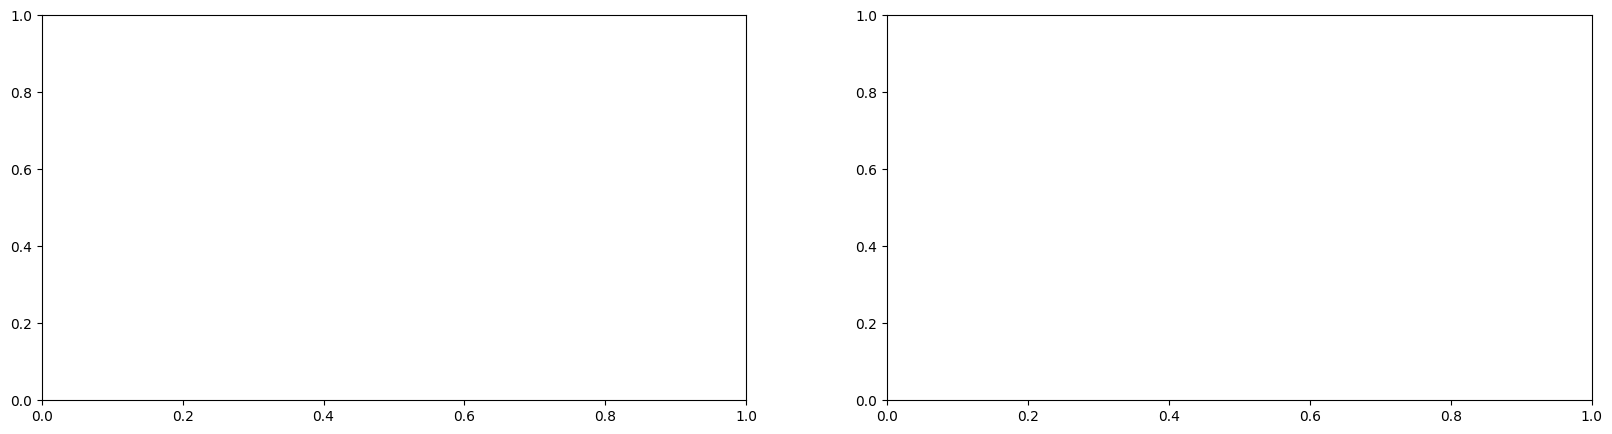

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

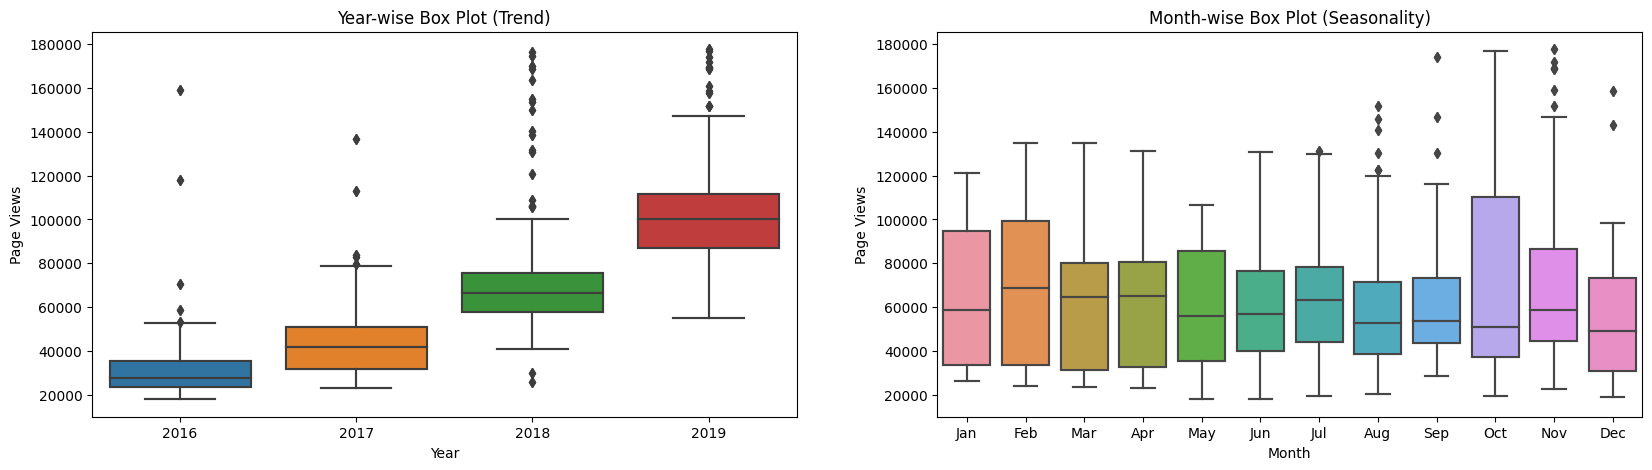

In [31]:
sns.boxplot(data=df_box, x="Year", y="Page Views", ax=ax[0])
sns.boxplot(data=df_box, x="Month", y="Page Views", ax=ax[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[1].set_title("Month-wise Box Plot (Seasonality)")
fig